In [1]:
import numpy as np

In [2]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])

In [7]:
y = np.array([0,1,1,0])

In [11]:
from sklearn.linear_model import RidgeClassifier, LogisticRegression
model_LS = RidgeClassifier(alpha=0)
model_LR = LogisticRegression(penalty='none')

model_LS.fit(X,y)
model_LR.fit(X,y)

In [24]:
model_LS.predict(X)

array([0, 0, 0, 0])

In [25]:
model_LR.predict(X)

array([0, 0, 0, 0])

In [27]:
model_LS.score(X,y)

0.5

In [29]:
model_LR.score(X,y)

0.5

In [30]:
from tensorflow.keras.models import Sequential

In [31]:
from tensorflow.keras.layers import Dense, Flatten

In [58]:
model_NN = Sequential()

In [74]:
model_NN.add(Dense(10,activation='relu'))

In [75]:
model_NN.add(Dense(1,activation='sigmoid'))

In [76]:
model_NN.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [81]:
model_NN.fit(X,y,epochs=3000,verbose=0)

In [86]:
output = model_NN.predict(X)

In [83]:
output>0.5

array([[False],
       [ True],
       [ True],
       [False]])

In [84]:
(output>0.5).astype(float)

array([[0.],
       [1.],
       [1.],
       [0.]])

In [88]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/255., X_test/255.

In [97]:
X_train.shape

(60000, 28, 28)

In [100]:
y_train.shape

(60000,)

In [118]:
from tensorflow.keras.layers import Flatten
model_NN2 = Sequential()
model_NN2.add(Flatten(input_shape=(28,28)))
model_NN2.add(Dense(128,activation='relu'))
model_NN2.add(Dense(10,activation='softmax'))
model_NN2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
model_NN2.fit(X_train, y_train, epochs=60, verbose=0)

In [127]:
model_NN2.evaluate(X_test,y_test)

313/313 [==============================] - 0s 605us/step - loss: 0.3951 - acc: 0.8880


[0.3951156735420227, 0.8880000114440918]

In [159]:
i=484

In [160]:
y_train[i]

1

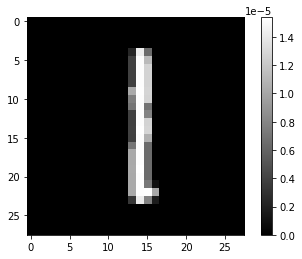

In [161]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(X_train[i], cmap='gray')
plt.colorbar()
plt.show()

In [164]:
model_NN2.predict(X_train[i].reshape(1,28,28))

array([[1.0392977e-06, 9.6723300e-01, 6.0672779e-03, 1.2323942e-02,
        4.0069321e-04, 2.3307677e-03, 3.1051619e-04, 6.8422286e-03,
        3.0784553e-03, 1.4120700e-03]], dtype=float32)

In [165]:
X_train[0].shape

(28, 28)

In [169]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/255., X_test/255.

In [178]:
from tensorflow.keras.layers import Flatten

model_NN2 = Sequential()
model_NN2.add(Flatten(input_shape=(28,28)))   # input
model_NN2.add(Dense(128,activation='relu'))   # 1
model_NN2.add(Dense(256,activation='relu'))   # 2
model_NN2.add(Dense(512,activation='relu'))   # 3
model_NN2.add(Dense(256,activation='relu'))   # 4
model_NN2.add(Dense(128,activation='relu'))   # 5
model_NN2.add(Dense(10,activation='softmax')) # output

model_NN2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

model_NN2.fit(X_train, y_train, epochs=50, verbose=0)

In [179]:
model_NN2.evaluate(X_test,y_test)

313/313 [==============================] - 0s 760us/step - loss: 0.1881 - acc: 0.9809


[0.18814049661159515, 0.98089998960495]

In [186]:
from sklearn.linear_model import RidgeClassifier, LogisticRegression
model_LR = LogisticRegression(penalty='none')

In [194]:
X_train2 = X_train.reshape(60000,784)

In [191]:
model_LR.fit(X_train2, y_train)

C:\Users\NGV05\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(penalty='none')

In [196]:
model_LR.score(X_train2,y_train)

0.9353

In [204]:
model_NN2 = Sequential()
model_NN2.add(Flatten(input_shape=(28,28)))   # input
model_NN2.add(Dense(10,activation='softmax')) # output

model_NN2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

model_NN2.fit(X_train, y_train, epochs=50, verbose=0)

In [205]:
model_NN2.evaluate(X_test,y_test)

313/313 [==============================] - 0s 699us/step - loss: 0.2823 - acc: 0.9254


[0.28226572275161743, 0.9254000186920166]